# Importar módulos

In [5]:
#Importando LIbrerias
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') #para ignorar las advertencias

PROBLEMA: DETERMINAR UN MODELO DE AGRUPAMIENTO QUE PERMITA IDENTIFICAR COMPORTAMIENTOS EN LOS CLIENTES DE UN MALL

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Cargar el conjunto de datos
data = pd.read_csv('Mall_Customers.csv')
data

#data.insert()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [10]:
# Seleccionar características relevantes para el clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [11]:
X.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


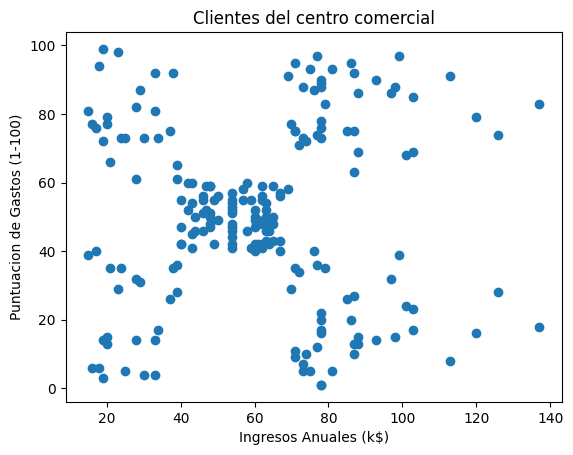

In [12]:
# Extraer las columnas para graficar
x = X['Annual Income (k$)']
y = X['Spending Score (1-100)']

# Graficar la nube de puntos
plt.scatter(x, y)
plt.xlabel('Ingresos Anuales (k$)')
plt.ylabel('Puntuacion de Gastos (1-100)')
plt.title('Clientes del centro comercial')
plt.show()

## Kmeans

In [13]:
#Importando librerias
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [15]:
train_data = data.drop(columns=["CustomerID","Genre","Age"],axis=1)

In [16]:
#EStandarizando las variables
sc = StandardScaler()
train_data = sc.fit_transform(train_data)
#train_data

In [17]:
#Escogiendo el mejor K
inertias = []
k = []

for i in range(1,10):
    model = KMeans(n_clusters=i,verbose=0)
    model.fit(train_data)
    k.append(i)
    inertias.append(model.inertia_)

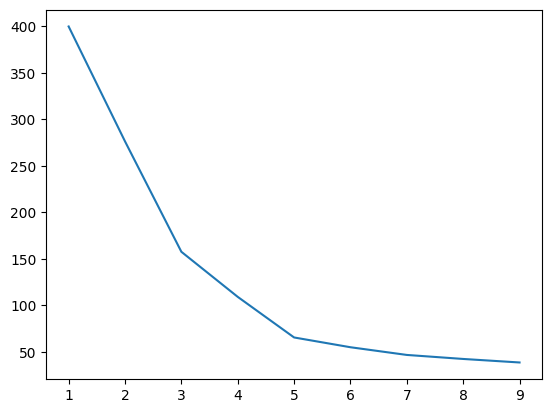

In [18]:
#Método del codo usando inercia
plt.plot(k,inertias)

#Como hay una curva en 5, el valor óptimo de k es 5

In [19]:
#Ddiseñar el modelo final después de elegir el valor óptimo de k
final_model = KMeans(n_clusters=5)
final_model.fit(train_data)

KMeans(n_clusters=5)

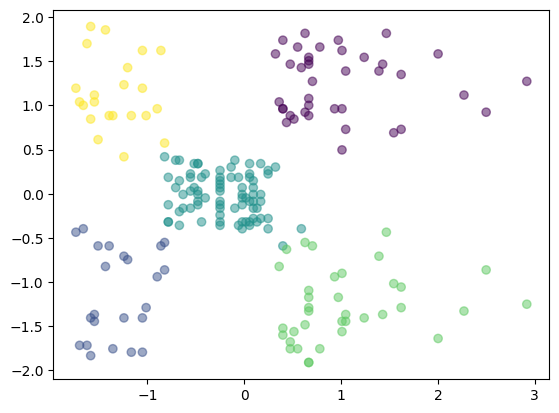

In [20]:
#Visualizando los clusters de KMeans
label = final_model.fit_predict(train_data)
xs = train_data[:,0]
ys = train_data[:,1]
plt.scatter(xs,ys,c=label,alpha=0.5)

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score,davies_bouldin_score,adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Ejemplo de datos
# Crear instancia de K-means
kmeans = KMeans(n_clusters=2, random_state=0)
# Realizar el clustering
labels = kmeans.fit_predict(X)
# Calcular el coeficiente de silueta
silhouette = silhouette_score(X, labels)
# Calcular el índice de Calinski-Harabasz
calinski = calinski_harabasz_score(X, labels)
# Calcular en Coeficiente de davies bouldin
davies_bouldin= davies_bouldin_score(X, labels)
# Calcuar la coherencia interna
inertia = kmeans.inertia_

# Calcuar la coherencia externa (en el ejemplo no tenemos los valores verdaderos )
#ari = adjusted_rand_score(true_labels, labels)


print("Coeficiente de silueta:", silhouette, ' [debe ser cercano a 1 ]')
print("Coeficiente de Davis-Bouldin:", davies_bouldin, ' [debe ser bajo ]')
print("Índice de Calinski-Harabasz:", calinski ,' [debe ser cercano a 1] ')
print("Índice de Coherencia:", inertia ,' [debe ser un valor alto]')
#print("Coherencia externa (ARI):", ari)


Coeficiente de silueta: 0.3848654187182249  [debe ser cercano a 1 ]
Coeficiente de Davis-Bouldin: 1.0105330079887929  [debe ser bajo ]
Índice de Calinski-Harabasz: 89.52751204050172  [debe ser cercano a 1] 
Índice de Coherencia: 185917.14253928524  [debe ser un valor alto]


In [14]:
# CONCLUSION
# La similitud intra-cluster y la disimilitud inter-cluster es 0.28 [los puntos estan bien agrupados por que es cercano a 1]
# La relacion entre la dispersion dentro e inter clusters es 0.86 [debe ser un numero bajo, tiene no una buena dispersion]
# La dispersión independiente dentro y inter de los clusters es 3.375 [debe ser un valor alto cuando es mas compacto y bien separados .. es bueno ]

## Hierarchial Clustering

In [23]:
#Importing Libraries
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [24]:
#Estandarizar
sc = StandardScaler()
train_data = sc.fit_transform(train_data)
# train_data

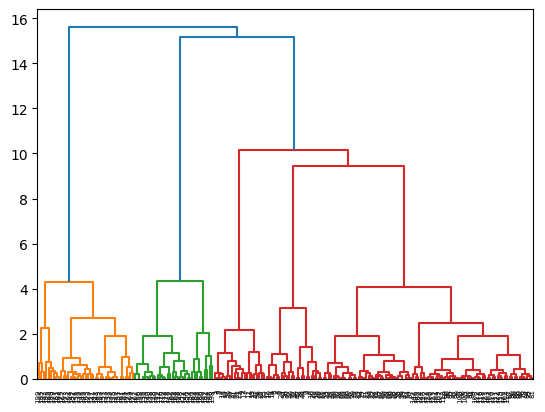

In [25]:
#Dendogram
linkage_data = linkage(train_data, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

In [18]:
##### n_clusters = numero de clusters

###### affinity =La métrica que se usará al calcular la distancia entre instancias e
#n una matriz de características.
#“euclidean”

###### linkage
##Qué criterio de vinculación utilizar. El criterio de vinculación determina qué distancia usar entre conjuntos de observación. El algoritmo fusionará los pares de clústeres que minimizan este criterio.
#'ward' minimiza la varianza de los grupos que se fusionan.
#'average' usa el promedio de las distancias de cada observación de los dos conjuntos.
#El enlace 'complete' o 'máximo' utiliza las distancias máximas entre todas las observaciones de los dos conjuntos.
#'single' utiliza el mínimo de las distancias entre todas las observaciones de los dos conjuntos.

In [27]:
#Hierarchial Clustering Model
hierarchical_cluster = AgglomerativeClustering(n_clusters=2,  linkage='ward')
labels = hierarchical_cluster.fit_predict(train_data)

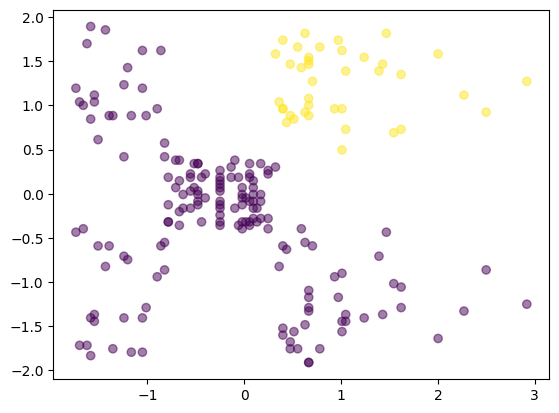

In [28]:
#Visualizing the clusters of Hierarchial Clustering
xs = train_data[:,0]
ys = train_data[:,1]
plt.scatter(xs,ys,c=labels,alpha=0.5)

# Metricas de evaluacion

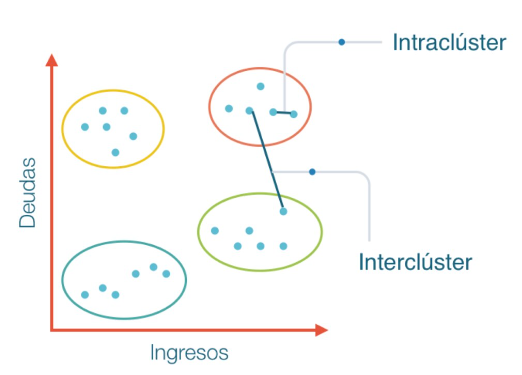

#### **Coeficiente de Silueta (Silhouette coefficient):**

Esta métrica calcula la similitud intra-cluster y la disimilitud inter-cluster para evaluar la calidad de los agrupamientos.

- Un valor cercano a 1 indica que los puntos están bien agrupados
- Un valor cercano a -1 indica que los puntos podrían estar mejor asignados a otros clusters.

#### **Coeficiente de Davis-Bouldin (Davis-Bouldin coefficient):**

Esta métrica calcula la relación entre la dispersión dentro de los clusters y la dispersión entre los clusters.
- Un valor más bajo indica una mejor separación de los clusters.(mejor si es un numero bajo)

#### **Índice de Calinski-Harabasz (Calinski-Harabasz index):**

Esta métrica considera tanto la dispersión dentro de los clusters como la dispersión entre los clusters

para evaluar la calidad de los agrupamientos.

- Un valor más alto indica agrupamientos más compactos y bien separados.

#### **La coherencia en la clusterización**


Es una métrica que se utiliza para evaluar la calidad de los agrupamientos generados por un algoritmo de clustering.

Esta métrica se centra en medir cuán coherentes y distintos son los clusters entre sí.

La coherencia en la clusterización se puede evaluar de diferentes formas, dependiendo del enfoque específico del algoritmo de clustering

y del dominio de aplicación.

algunas técnicas comunes utilizadas para evaluar la coherencia en la clusterización:

- Coherencia interna (Internal coherence): Esta técnica mide la coherencia dentro de cada cluster. Puede incluir medidas como la distancia media intra-cluster o la similitud media entre los puntos dentro de un mismo cluster. Cuanto menor sea la dispersión o mayor la similitud dentro de un cluster, mayor será la coherencia interna.

- Coherencia externa (External coherence): Esta técnica mide la coherencia entre clusters diferentes. Puede incluir medidas como la distancia media inter-cluster o la diferencia media entre los puntos de diferentes clusters. Cuanto mayor sea la distancia o mayor la diferencia entre clusters, mayor será la coherencia externa.

Es importante tener en cuenta que la elección de la métrica de evaluación depende del algoritmo de clustering

utilizado y del objetivo específico del problema. Algunas métricas pueden ser más apropiadas para ciertos tipos

de datos o estructuras de clusterización.

In [31]:
# Definir los modelos de clustering
models = {
    'KMeans': KMeans(n_clusters=2, random_state=0),
    'Agglomerative (ward)': AgglomerativeClustering(n_clusters=2, linkage='ward'),
    'Agglomerative (average)': AgglomerativeClustering(n_clusters=3,linkage='average')

}

# Iterar sobre los modelos
for model_name, model in models.items():
    # Realizar el clustering
    labels = model.fit_predict(X)


    # Calcular el coeficiente de silueta
    silhouette = silhouette_score(X, labels)
    # Calcular el índice de Calinski-Harabasz
    calinski = calinski_harabasz_score(X, labels)
    # Calcular en doeficiente de davies bouldin
    davies_bouldin= davies_bouldin_score(X, labels)
    # Calcuar la coherencia interna
    inertia = kmeans.inertia_


    # Imprimir los resultados
    print(f"Modelo: {model_name}")
    print("Coeficiente de silueta:", silhouette, ' [debe ser cercano a 1 ]')
    print("Coeficiente de Davis-Bouldin:", davies_bouldin, ' [debe ser bajo ]')
    print("Índice de Calinski-Harabasz:", calinski ,' [debe ser cercano a 1] ')
    print("Índice de Coherencia:", inertia ,' [debe ser un valor alto] ')
    print()

Modelo: KMeans
Coeficiente de silueta: 0.3848654187182249  [debe ser cercano a 1 ]
Coeficiente de Davis-Bouldin: 1.0105330079887929  [debe ser bajo ]
Índice de Calinski-Harabasz: 89.52751204050172  [debe ser cercano a 1] 
Índice de Coherencia: 185917.14253928524  [debe ser un valor alto] 

Modelo: Agglomerative (ward)
Coeficiente de silueta: 0.36706444723912895  [debe ser cercano a 1 ]
Coeficiente de Davis-Bouldin: 1.3734011244003579  [debe ser bajo ]
Índice de Calinski-Harabasz: 86.79455894460492  [debe ser cercano a 1] 
Índice de Coherencia: 185917.14253928524  [debe ser un valor alto] 

Modelo: Agglomerative (average)
Coeficiente de silueta: 0.46761358158775435  [debe ser cercano a 1 ]
Coeficiente de Davis-Bouldin: 0.715276820248462  [debe ser bajo ]
Índice de Calinski-Harabasz: 151.5570090006799  [debe ser cercano a 1] 
Índice de Coherencia: 185917.14253928524  [debe ser un valor alto] 

